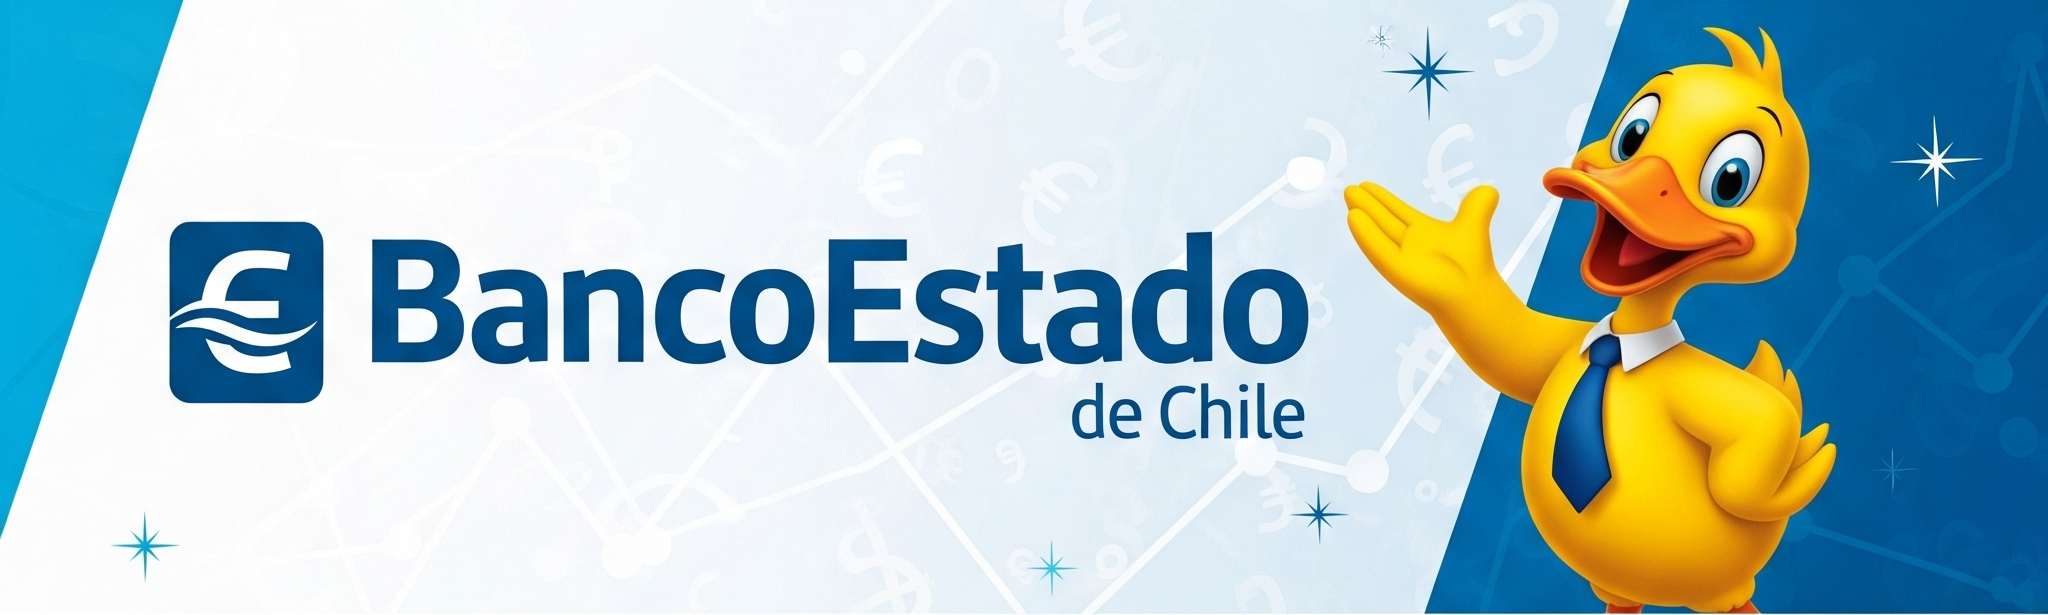

In [3]:
from IPython.display import Image
from tensorflow.python.checkpoint.util import objects_ids_and_slot_variables_and_paths
from unicodedata import category

Image(filename='bco-estado-cl.png')

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Carga de datos
data = pd.read_csv("bank.csv", sep=";")

In [8]:
data.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [6]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [9]:
data.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
257,57,blue-collar,married,unknown,unknown,yes,no,telephone,may,tue,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
2148,39,technician,married,basic.6y,no,no,no,cellular,apr,tue,...,3,999,0,nonexistent,-1.8,93.075,-47.1,1.453,5099.1,no
510,49,blue-collar,married,basic.6y,no,no,no,cellular,aug,thu,...,2,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
416,43,blue-collar,married,basic.4y,no,no,yes,cellular,may,wed,...,1,999,1,failure,-1.8,92.893,-46.2,1.281,5099.1,no
1654,58,management,divorced,university.degree,no,yes,no,telephone,jul,wed,...,5,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,no


In [10]:
data.shape[0], data.shape[1]

(4119, 21)

In [11]:
data.shape

(4119, 21)

In [12]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [13]:
categorical_vars = data.select_dtypes(exclude=np.number).columns.to_list()
categorical_vars

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [18]:
numerical_vars = data.select_dtypes(include=np.number).columns.to_list()
numerical_vars

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [24]:
valores_unicos = data['job'].unique()
valores_unicos

array(['blue-collar', 'services', 'admin.', 'entrepreneur',
       'self-employed', 'technician', 'management', 'student', 'retired',
       'housemaid', 'unemployed', 'unknown'], dtype=object)

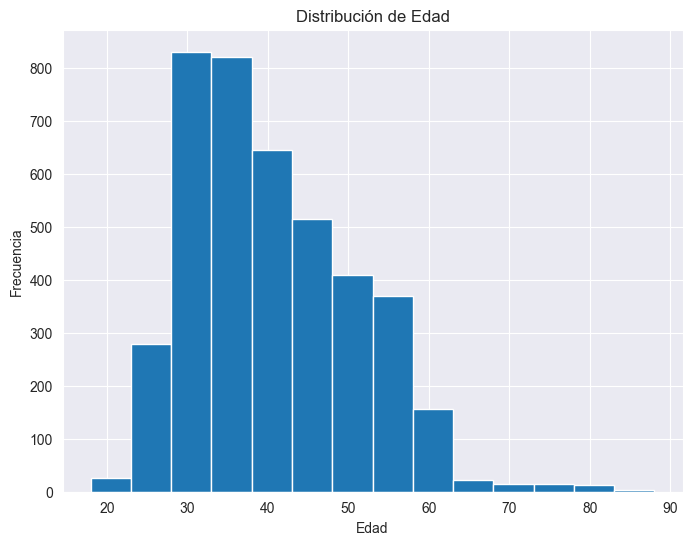

In [25]:
k = int(np.ceil(1+np.log2(data.shape[0])))
data['age'].hist(bins=k, figsize=(8,6)).set_title("Distribución de Edad")
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

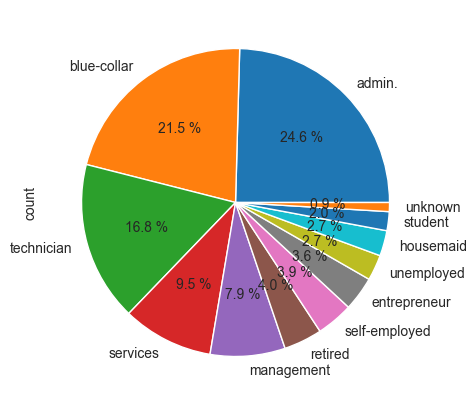

In [28]:
data['job'].value_counts().plot.pie(figsize=(5,5), autopct="%0.1f %%");

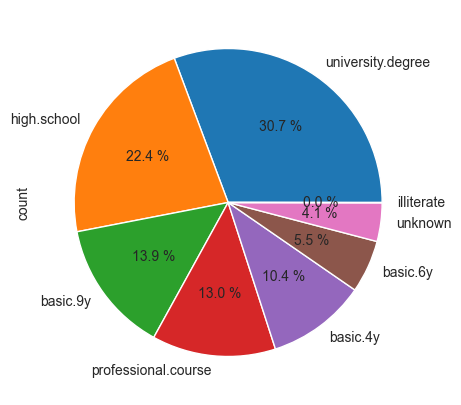

In [29]:
data['education'].value_counts().plot.pie(figsize=(5,5), autopct="%0.1f %%");

In [43]:
        # Tablas pivote
superviviente_por_genero = data[['loan', 'marital']].groupby(['marital'], as_index=False).count().sort_values(by='loan', ascending=False)
superviviente_por_genero


,marital,loan
1,married,2509
2,single,1153
0,divorced,446
3,unknown,11


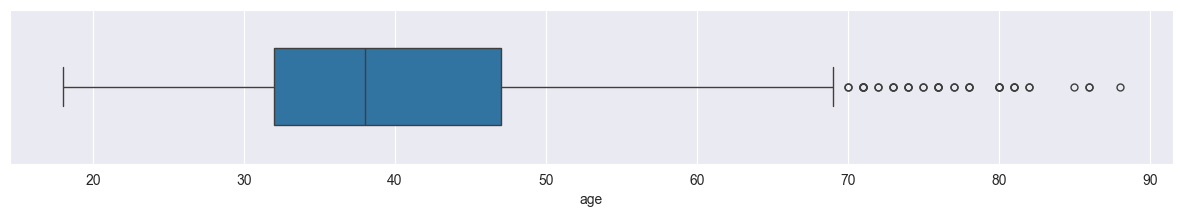

In [46]:
plt.figure(figsize=(15,2))
sns.boxplot(x=data["age"], fliersize=5, width=0.5);

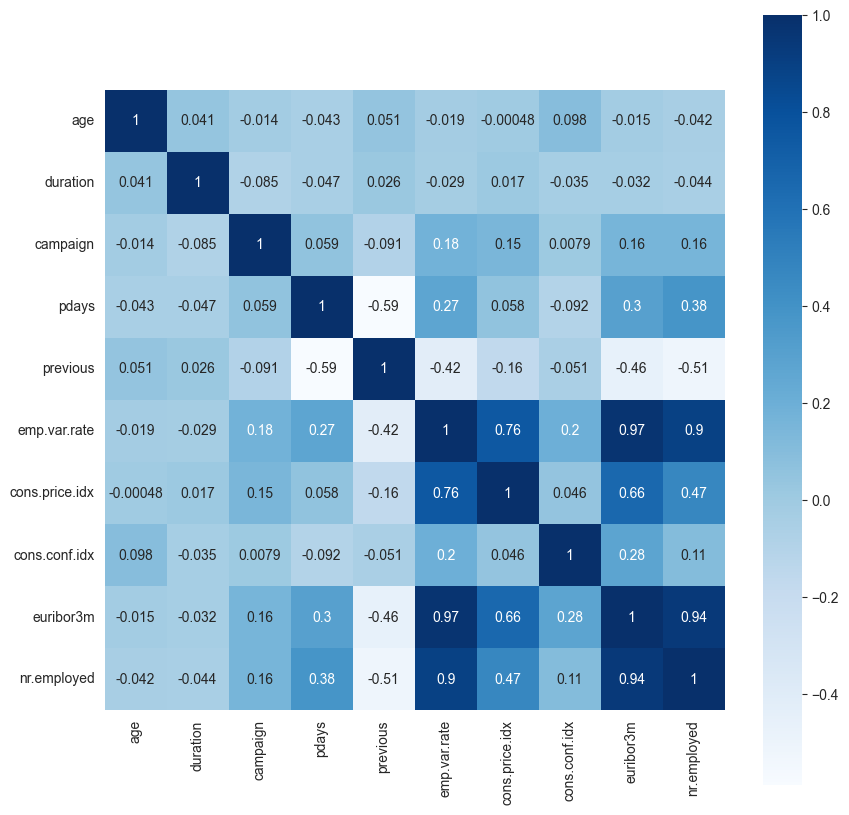

In [70]:
numeric_data = data.select_dtypes(include=np.number)
corr = numeric_data.corr(method='pearson')

plt.figure(figsize=(10,10))
sns.heatmap(data=corr, square=True, annot=True, cmap="Blues")
plt.show()